In [2]:
from etl import read_csv
import pandas as pd
import json
import seaborn as sns

### Extraction

#### Reading CSV

In [3]:
data = read_csv()
json_data = json.loads(data)
spotify_df = pd.json_normalize(data=json_data)

In [4]:
spotify_df.drop("Unnamed: 0", axis=1, inplace=True)
spotify_df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


#### Identifying data types

In [5]:
spotify_df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

####  Dimensions of the dataset

In [6]:
spotify_df.shape

(114000, 20)

#### How many null do we have for each variable

In [7]:
(
    spotify_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

album_name          1
track_name          1
artists             1
track_id            0
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

#### How many duplicate do we have?

In [24]:
duplicados_por_columna = spotify_df.duplicated()
duplicados_por_columna.sum()

9298

#### Eliminamos las canciones repetidas y dejamos unicamente el primer registro

In [26]:
spotify_df = spotify_df.drop_duplicates(keep='first')

#### Null's proportion for each variable

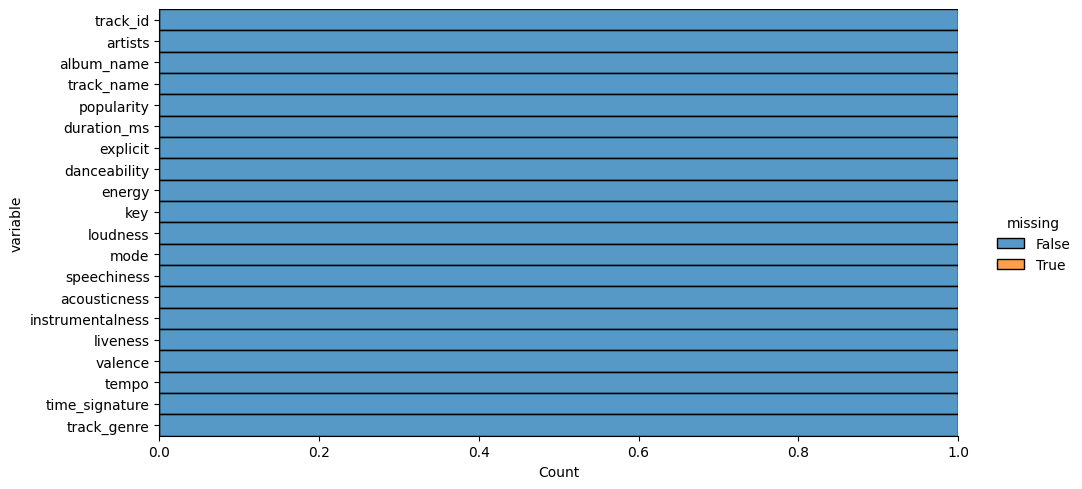

In [9]:
(
    spotify_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### Transformation Process

#### Identifying the different genres we have and agrouping them

In [10]:
spotify_df["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

As we can see, there are many genres, this make our analysis complicated, so, I decided to reduce categories by agroupping some of them

In [11]:
mapeo_generos = {
    "rock": "Rock and similars",
    "alt-rock": "Rock and similars",
    "alternative": "Rock and similars",
    "grunge": "Rock and similars",
    "punk": "Rock and similars",
    "rockabilly": "Rock and similars",
    "punk-rock": "Rock and similars",
    "hard-rock": "Rock and similars",
    "rock-n-roll": "Rock and similars",
    "psych-rock": "Rock and similars",
    "pop-film": "Pop and similars",
    "power-pop": "Pop and similars",
    "pop": "Pop and similars",
    "pop-rock": "Pop and similars",
    "synth-pop": "Pop and similars",
    "mandopop": "Pop and similars",
    "electronic": "Electronic and similars",
    "techno": "Electronic and similars",
    "detroit-techno": "Electronic and similars",
    "trance": "Electronic and similars",
    "minimal-techno": "Electronic and similars",
    "electro": "Electronic and similars",
    "deep-house": "Electronic and similars",
    "dubstep": "Electronic and similars",
    "house": "Electronic and similars",
    "progressive-house": "Electronic and similars",
    "hip-hop": "HipHop and Rap",
    "afrobeat": "HipHop and Rap",
    "rap": "HipHop and Rap",
    "trip-hop": "HipHop and Rap",   
    "reggae": "Reggae and Dancehall",
    "dancehall": "Reggae and Dancehall",
    "metal": "Metal and similars",
    "black-metal": "Metal and similars",
    "death-metal": "Metal and similars",
    "heavy-metal": "Metal and similars",
    "metalcore": "Metal and similars",
    "jazz": "Jazz and Blues",
    "blues": "Jazz and Blues",
    "classical": "Classic Music",
    "opera": "Classic Music",
    "tango": "Classic Music",
    "acoustic": "Classic Music",
    "piano": "Classic Music",
    "guitar": "Classic Music",
    "latino": "Latin Music",
    "salsa": "Latin Music",
    "samba": "Latin Music",
    "reggaeton": "Latin Music",
    "spanish": "Latin Music",
    "brazil": "Latin Music",
    "ambient": "Others",
    "comedy": "Others",
    "country": "Others",
    "disco": "Others",
    "funk": "Others",
    "gospel": "Others",
    "indie": "Others",
    "indie-pop": "Others",
    "new-age": "Others",
    "rockability": "Others",
    "soul": "Others",
    "songwriter": "Others",
    "drum-and-bass": "Others",
    "bluegrass": "Others",
    "breakbeat": "Others",
    "cantopop": "Others",
    "world-music": "Others",
    "chicago-house": "Others",
    "drum-and-bass": "Others",
    "anime": "Special Categories",
    "children": "Special Categories",
    "disney": "Special Categories",
    "kids": "Special Categories",
    "party": "Special Categories",
    "sad": "Special Categories",
    "sleep": "Special Categories",
    "study": "Special Categories",
    "study": "Special Categories",
    "study": "Special Categories",
    "study": "Special Categories",
    "singer-songwriter": "Special Categories",
    "ska": "Special Categories",
    "show-tunes": "Special Categories",
    "sertanejo": "Special Categories",
    "r-n-b": "Special Categories",
    "pagode": "Special Categories",
    "malay": "Special Categories",
    "mpb": "Special Categories",
    "industrial": "Special Categories",
    "idm": "Special Categories", 
    "honky-tonk": "Special Categories",
    "hardstyle": "Special Categories",
    "hardcore": "Special Categories",
    "happy": "Special Categories",
    "groove": "Special Categories",
    "goth": "Special Categories",
    "grindcore": "Special Categories",
    "garage": "Special Categories",
    "garage": "Special Categories",
    "garage": "Special Categories",
    "garage": "Special Categories",
    "emo": "Special Categories",
    "dub": "Special Categories",
    "edm": "Special Categories",
    "forro": "Special Categories",
    "romance": "Special Categories",
    "club": "Special Categories",
    "dance": "Special Categories",
    "folk": "Special Categories",
    "chill": "Special Categories",
    "swedish": "European Music",
    "french": "European Music",
    "turkish": "European Music",
    "iranian": "European Music",
    "german": "European Music",
    "british": "European Music",
    "j-dance":"Oriental Music",
    "j-idol":"Oriental Music",
    "j-pop":"Oriental Music",
    "j-rock":"Oriental Music",
    "k-pop":"Oriental Music",
    "indian":"Oriental Music",
    

}
spotify_df['track_genre'] = spotify_df['track_genre'].replace(mapeo_generos)

In [12]:
spotify_df["track_genre"].unique()

array(['Classic Music', 'HipHop and Rap', 'Rock and similars', 'Others',
       'Special Categories', 'Metal and similars', 'Jazz and Blues',
       'Latin Music', 'European Music', 'Reggae and Dancehall',
       'Electronic and similars', 'Oriental Music', 'latin',
       'Pop and similars'], dtype=object)

#### Creating a new column where duration is calculated in minutes instead of ms

In [13]:
spotify_df['duration_min'] = (spotify_df['duration_ms'] / 60000).round(2) 
spotify_df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,...,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,Classic Music,3.84
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,...,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,Classic Music,2.49


#### Creating a new column where "duration" becomes a categorical variable

In [14]:
# Define Limits to create new categories
limits = [0, 3, 4, float('inf')]

# Setting the name of the new categories
labels = ['Poca Duracion', 'Media Duracion', 'Mucha Duracion']

# use df.cut() to create the new column
spotify_df['duration_category'] = pd.cut(spotify_df['duration_min'], bins=limits, labels=labels, right=False)

#### Creating a new column where "popularity" becomes a categorical variable

In [15]:
# Define Limits to create new categories
limits = [0, 30, 60, 100]

# Setting the name of the new categories
labels = ['Poca Popularidad', 'Media Popularidad', 'Mucha Popularidad']

# use df.cut() to create the new columns
spotify_df['popularity_category'] = pd.cut(spotify_df['popularity'], bins=limits, labels=labels, right=False)

In [16]:
spotify_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'duration_category', 'popularity_category'],
      dtype='object')